In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Setting up parameters

In [2]:
CAPTURE_FRAMES = 100
ERODE_SIZE = 2

### Capturing a frame

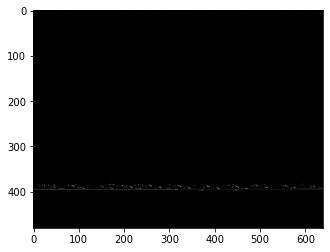

In [6]:
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()
plt.imshow(frame)

### Making sure we have a frame

In [8]:
if not ret:
    print("failed to grab frame")

### Converting image to Black and White

In [9]:
grayImage = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
(thresh, hand_mask) = cv2.threshold(grayImage, 80, 255, cv2.THRESH_BINARY)

### Finding contours in image

In [11]:
contours, _ = cv2.findContours(hand_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour_masked = hand_mask.copy()

### Extracting hand sized contours

In [15]:
hands = []
for contour in contours:
    if 2000 <= cv2.contourArea(contour):
        cv2.drawContours(frame, [contour], 0, (127, 127, 127), 3)
        hull_shape = cv2.convexHull(contour, returnPoints=True)
        
        hull = cv2.convexHull(contour, returnPoints=False)

        cv2.drawContours(frame, [hull_shape], 0, (100, 100, 100), 3)
        
        for point in contour:
            if not(point[0] in hull):
                cv2.circle(frame, point, 5, [0, 0, 200], -1)
        print("Reached")
        defects = cv2.convexityDefects(contour, hull)
        for point in defects:
            # print(point[0, 3])
            if point[0, 3] > 500:
                defect = tuple(contour[point[0, 2]][0])
                start = tuple(contour[point[0, 0]][0])
                end = tuple(contour[point[0, 1]][0])
                dist = np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)
                print(f"norm{dist}")
                if dist > 3:
                    # print(defect)
                    cv2.line(frame, start, end, [255, 0, 0], 5)
                    cv2.circle(frame, defect, 5, [0, 0, 255], -1)
        hands.append(cv2.boundingRect(contour))



### Displaying Extracted images

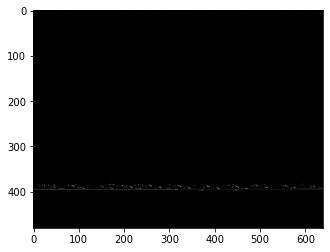

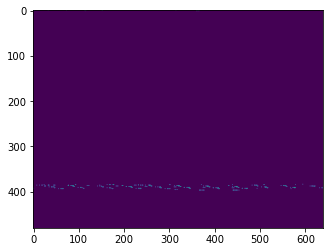

In [17]:
plt.figure()
plt.imshow(frame)

plt.figure()
plt.imshow(contour_masked)
for hand_index in range(len(hands)):
    x, y, w, h = hands[hand_index]
    plt.figure()
    plt.imshow("Mask%d"%hand_index, frame[y:y+h, x:x+w])